In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

**Importing the dataset**

In [3]:
data=pd.read_csv('/Users/alok.g.v/Desktop/python practice/Guvi Task/Task7/Assignment11_to_16/Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [4]:
gender_dum=pd.get_dummies(data['Gender'],prefix='Gender')
data=pd.concat([data,gender_dum],axis=1)
data

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,Male,19,19000,0,0,1
1,15810944,Male,35,20000,0,0,1
2,15668575,Female,26,43000,0,1,0
3,15603246,Female,27,57000,0,1,0
4,15804002,Male,19,76000,0,0,1
...,...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,1,0
396,15706071,Male,51,23000,1,0,1
397,15654296,Female,50,20000,1,1,0
398,15755018,Male,36,33000,0,0,1


**Feature Scaling**

In [5]:
scaler=StandardScaler()
data['EstimatedSalary']=scaler.fit_transform(data[['EstimatedSalary']])
X=data[['Age','EstimatedSalary','Gender_Female','Gender_Male']]
y=data[['Purchased']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(280, 4) (120, 4) (280, 1) (120, 1)


**Fitting Random Forest to the Training set**

In [7]:
clf=RandomForestClassifier(n_estimators=100, criterion="entropy",random_state=0)
clf=clf.fit(X_train,y_train)


<ipython-input-7-fea25badfe0b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf=clf.fit(X_train,y_train)


**Predicting the Test set results**

In [9]:
y_pred=clf.predict(X_test)
acc=accuracy_score(y_pred,y_test)
acc

0.8833333333333333

**Making the Confusion Matrix**

In [10]:
confusion_matrix(y_pred,y_test)

array([[66,  8],
       [ 6, 40]])

**Visualising the Training set results**

[Text(1232.25, 1283.5, 'Age <= 44.5\nentropy = 0.877\nsamples = 173\nvalue = [197, 83]\nclass = 0'),
 Text(697.5, 1132.5, 'EstimatedSalary <= 0.58\nentropy = 0.487\nsamples = 127\nvalue = [186, 22]\nclass = 0'),
 Text(372.0, 981.5, 'Age <= 36.5\nentropy = 0.121\nsamples = 111\nvalue = [180, 3]\nclass = 0'),
 Text(279.0, 830.5, 'entropy = 0.0\nsamples = 73\nvalue = [117, 0]\nclass = 0'),
 Text(465.0, 830.5, 'EstimatedSalary <= 0.11\nentropy = 0.267\nsamples = 38\nvalue = [63, 3]\nclass = 0'),
 Text(372.0, 679.5, 'entropy = 0.0\nsamples = 28\nvalue = [52, 0]\nclass = 0'),
 Text(558.0, 679.5, 'Age <= 39.5\nentropy = 0.75\nsamples = 10\nvalue = [11, 3]\nclass = 0'),
 Text(465.0, 528.5, 'Gender_Female <= 0.5\nentropy = 0.918\nsamples = 7\nvalue = [6, 3]\nclass = 0'),
 Text(279.0, 377.5, 'Age <= 38.0\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = 0'),
 Text(186.0, 226.5, 'EstimatedSalary <= 0.213\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(93.0, 75.5, 'entropy = 0

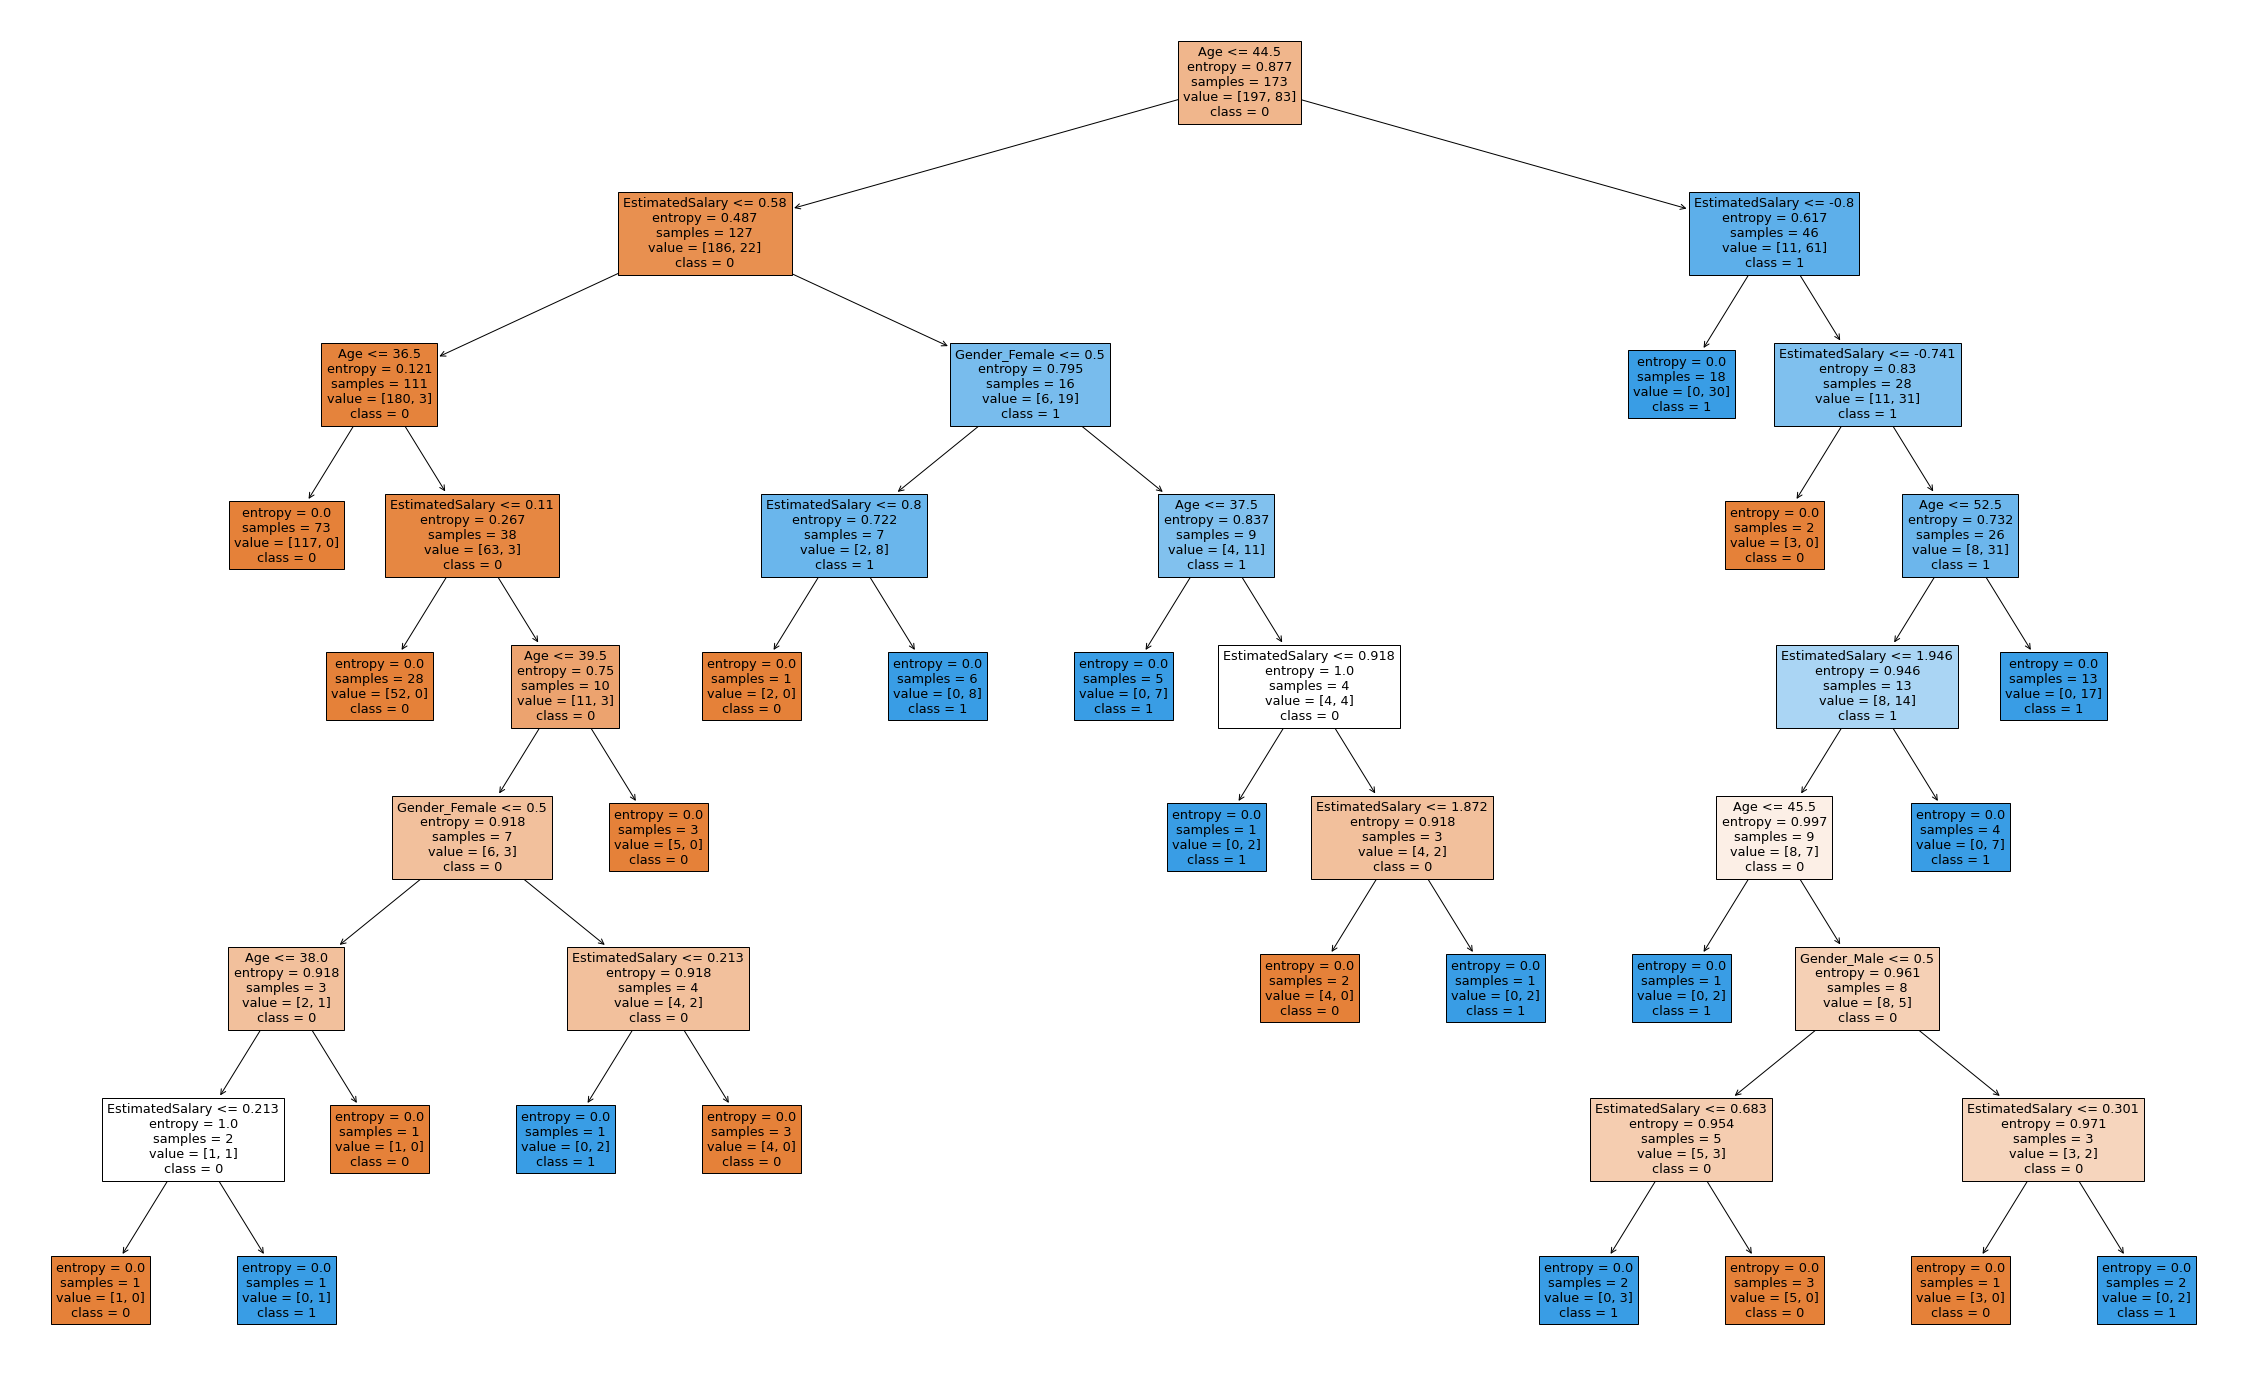

In [12]:
plt.figure(figsize=(40,25))

tree.plot_tree(clf.estimators_[0],feature_names=X_train.columns,class_names=['0','1'],filled = True)

**Visualising the Test set results**